# Problem 2: German Credit Dataset

In [181]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt

Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

In [105]:
germancredit_file = open("GermanCredit.csv")
germancredit_df = pd.read_csv(germancredit_file)
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


## Preprocessing

1. Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [106]:
columns_none_dict = dict() # dict that maps column names to the number of 'none' values
counter = 0 # 
for column in germancredit_df:
    if column not in columns_none_dict:
        columns_none_dict[column] = 0 # start counter of 'none' values
    
    for value in germancredit_df[column].values: # track the number of 'none' values in column
        if value == "none":
            columns_none_dict[column] += 1 # 

In [107]:
columns_none_dict

{'checking_status': 0,
 'duration': 0,
 'credit_history': 0,
 'purpose': 0,
 'credit_amount': 0,
 'savings_status': 0,
 'employment': 0,
 'installment_commitment': 0,
 'personal_status': 0,
 'other_parties': 907,
 'residence_since': 0,
 'property_magnitude': 0,
 'age': 0,
 'other_payment_plans': 814,
 'housing': 0,
 'existing_credits': 0,
 'job': 0,
 'num_dependents': 0,
 'own_telephone': 596,
 'foreign_worker': 0,
 'class': 0}

In [108]:
def drop_columns(df, n, columns_none_dict): # drop n columns from dataframe, df
    order = 0
    columns_to_drop = []
    i = 0
    
    columns_none_sorted = sorted(columns_none_dict.items(), key=lambda x: x[1], reverse=True)
    
    while i != n:
        df.drop(columns_none_sorted[i][0], axis=1, inplace=True)
        i += 1
        
#     column_order = dict()
#     for column in columns_none_dict:
#         column_order[column] = order
#         order += 1      
    
#     print(column_order)

In [109]:
drop_columns(germancredit_df, 3, columns_none_dict)

In [110]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


2. Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [111]:
for i in range(0, germancredit_df.shape[0]):
    for j in range(0, germancredit_df.shape[1]):
        value = germancredit_df.iat[i, j]

        if type(value) is str:
            value = value.replace("'", "") # remove unnecessary apostrophes
            germancredit_df.iat[i, j] = value # update dataframe  

In [112]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


3. The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [113]:
checking_status_dict = dict() # dict that maps values in checking_status column
checking_status_dict['no checking'] = "No Checking"
checking_status_dict['<0'] = "Low"
checking_status_dict['0<=X<200'] = "Medium"
checking_status_dict['>=200'] = "High"

for index, row in germancredit_df.iterrows():
    # print(index, row["checking_status"])
    if row["checking_status"] in checking_status_dict:
        germancredit_df.at[index, "checking_status"] = checking_status_dict[row["checking_status"]] # update row value using index and row

In [114]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [115]:
savings_status_dict = dict() # dict that maps values in savings_status column
savings_status_dict['no known savings'] = "No Savings"
savings_status_dict['<100'] = "Low"
savings_status_dict['100<=X<500'] = "Medium"
savings_status_dict['500<=X<1000'] = "High"
savings_status_dict['>=1000'] = "High"

for index, row in germancredit_df.iterrows():
    if row["savings_status"] in savings_status_dict:
        germancredit_df.at[index, "savings_status"] = savings_status_dict[row["savings_status"]] # update row value using index and row

In [116]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


5. Change class column values from 'good' to '1' and 'bad' to '0'.

In [117]:
class_dict = dict() # dict that maps values in class column
class_dict["good"] = 1
class_dict["bad"] = 0

for index, row in germancredit_df.iterrows():
    if row["class"] in class_dict:
        germancredit_df.at[index, "class"] = class_dict[row["class"]] # update row value using index and row

In [118]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


6. Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [121]:
employment_dict = dict() # dict that maps values in class column
employment_dict["unemployed"] = "Unemployed"
employment_dict["<1"] = "Amateur"
employment_dict["1<=X<4"] = "Professional"
employment_dict["4<=X<7"] = "Experienced"
employment_dict[">=7"] = "Expert"

for index, row in germancredit_df.iterrows():
    if row["employment"] in employment_dict:
        germancredit_df.at[index, "employment"] = employment_dict[row["employment"]] # update row value using index and row

In [122]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


## Analysis

1. Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [145]:
pd.crosstab(germancredit_df.foreign_worker, germancredit_df["class"])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


b. Similarly, get the count of each category of employment for each category of saving_status.

In [147]:
pd.crosstab(germancredit_df.employment, germancredit_df.savings_status)

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2. Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [151]:
count = 0 # the number of rows that fit the above specifications
running_sum = 0 # running sum of credit amount

for index, row in germancredit_df.iterrows():
#     print(row)
        
    if row["personal_status"] == "male single" and row["employment"] == "Experienced":
        running_sum += row["credit_amount"]
        count += 1 
        
average_credit_amount = running_sum / count

In [152]:
average_credit_amount

4142.592592592592

3. Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [155]:
# loop through each job type
# keep track of the count and running sum of credit duration for each job type
# store the result in a dict and print at the end

job_types = []
for index, row in germancredit_df.iterrows():
    job_type = row["job"]
    
    if job_type not in job_types:
        job_types.append(job_type)
        
# print(job_types)

average_credit_duration_dict = dict()
for job_type in job_types:
    count = 0 # the number of rows that fit the job_type specification
    running_sum = 0 # running sum of credit duration
    
    for index, row in germancredit_df.iterrows():
        if row["job"] == job_type:
            running_sum += row["duration"]
            count += 1
            
    average_credit_duration = running_sum / count
    average_credit_duration_dict[job_type] = average_credit_duration

In [156]:
average_credit_duration_dict

{'skilled': 21.41111111111111,
 'unskilled resident': 16.535,
 'high qualif/self emp/mgmt': 25.16891891891892,
 'unemp/unskilled non res': 17.363636363636363}

4. For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
    
    Most common checking status: ...
    
    Most common savings status: ...

In [169]:
# iterate through each row of the dataframe, focusing on the column "purpose" = "education"
# maintain a dict for checking status and a dict for savings status, keeping a count of each of the different values
# in the end, get the largest for each and print those

checking_status_dict = dict() # dict that maps each checking status value to the number of its occurences
savings_status_dict = dict() # dict that maps each savings status value to the number of its occurences

for index, row in germancredit_df.iterrows():
    if row["purpose"] == "education":
        if row["checking_status"] not in checking_status_dict:
            checking_status_dict[row["checking_status"]] = 1
        else:
            checking_status_dict[row["checking_status"]] += 1
            
        if row["savings_status"] not in savings_status_dict:
            savings_status_dict[row["savings_status"]] = 1
        else:
            savings_status_dict[row["savings_status"]] += 1
            
# print(checking_status_dict)            
# print(savings_status_dict)
print("Most common checking status:", max(checking_status_dict, key=checking_status_dict.get))
print("Most common savings status:", max(savings_status_dict, key=savings_status_dict.get))

{'No Checking': 20, 'Low': 13, 'Medium': 13, 'High': 4}
{'Low': 30, 'No Savings': 11, 'Medium': 5, 'High': 4}
Most common checking status: No Checking
Most common savings status: Low


## Visualization

1. Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.

Text(0.5, 1.0, 'checking_status VS. personal_status')

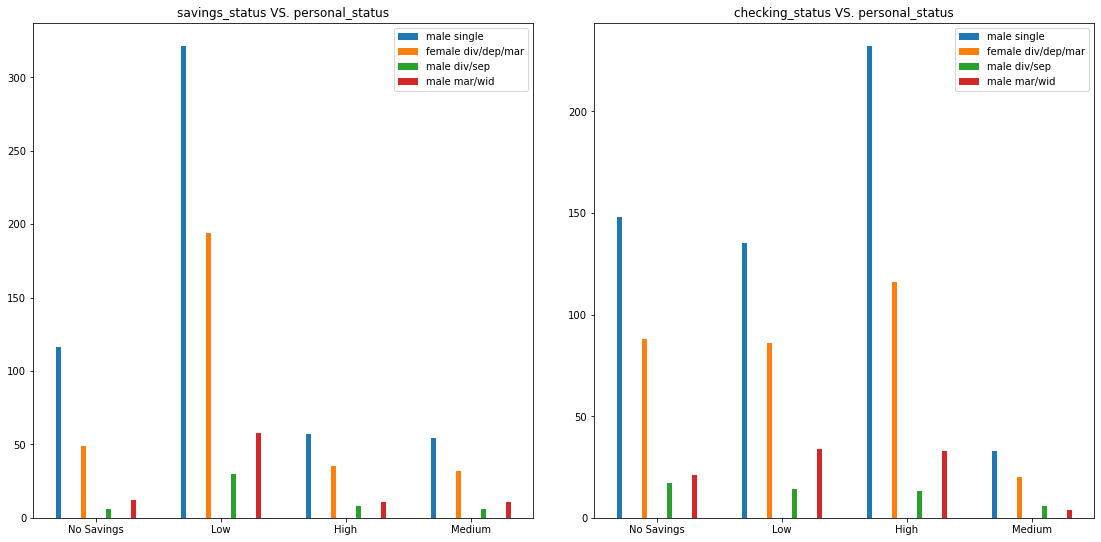

In [246]:
# SUBPLOT 1: SAVINGS_STATUS VS. PERSONAL_STATUS BAR CHART
ss_categories = []    
ps_categories = []
for index, row in germancredit_df.iterrows():
    ss_category = row["savings_status"]
    if ss_category not in ss_categories:
        ss_categories.append(ss_category)
        
    ps_category = row["personal_status"]
    if ps_category not in ps_categories:
        ps_categories.append(ps_category)
        
# print(ss_categories)
# print(ps_categories)

ps_category_dict = dict()
for ps_category in ps_categories:
    ps_category_dict[ps_category] = [] # initialize list to store number of people in each ss_category
    # count the number of people that fall under ss_category for each ps_category in ps_categories
    for ss_category in ss_categories:
        count = 0
        for index, row in germancredit_df.iterrows():
            if row["personal_status"] == ps_category and row["savings_status"] == ss_category:
                count += 1
                
        ps_category_dict[ps_category].append(count)

# initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=3.0)

# SUBPLOT 1: SAVINGS_STATUS VS. PERSONAL_STATUS BAR CHART

# male single
male_single_y = ps_category_dict['male single']
male_single_x = [5, 25, 45, 65]
axes[0].bar(male_single_x, male_single_y, label='male single')

# female div/dep/mar
female_div_dep_mar_y = ps_category_dict['female div/dep/mar']
female_div_dep_mar_x = [9, 29, 49, 69]
axes[0].bar(female_div_dep_mar_x, female_div_dep_mar_y, label='female div/dep/mar')

# male div/sep
male_div_sep_y = ps_category_dict['male div/sep']
male_div_sep_x = [13, 33, 53, 73]
axes[0].bar(male_div_sep_x, male_div_sep_y, label='male div/sep')

# male mar/wid
male_mar_wid_y = ps_category_dict['male mar/wid']
male_mar_wid_x = [17, 37, 57, 77]
axes[0].bar(male_mar_wid_x, male_mar_wid_y, label='male mar/wid')

axes[0].set_xticks([11, 31, 51, 71])
axes[0].set_xticklabels(['No Savings', 'Low', 'High', 'Medium'])

axes[0].legend()
axes[0].set_title("savings_status VS. personal_status")

# SUBPLOT 2: CHECKING_STATUS VS. PERSONAL_STATUS BAR CHART
cs_categories = []    
ps_categories = []
for index, row in germancredit_df.iterrows():
    cs_category = row["checking_status"]
    if cs_category not in cs_categories:
        cs_categories.append(cs_category)
        
    ps_category = row["personal_status"]
    if ps_category not in ps_categories:
        ps_categories.append(ps_category)
        
# print(cs_categories)
# print(ps_categories)

ps_category_dict = dict()
for ps_category in ps_categories:
    ps_category_dict[ps_category] = [] # initialize list to store number of people in each cs_category
    # count the number of people that fall under cs_category for each ps_category in ps_categories
    for cs_category in cs_categories:
        count = 0
        for index, row in germancredit_df.iterrows():
            if row["personal_status"] == ps_category and row["checking_status"] == cs_category:
                count += 1
                
        ps_category_dict[ps_category].append(count)
        
# male single
male_single_y = ps_category_dict['male single']
male_single_x = [5, 25, 45, 65]
axes[1].bar(male_single_x, male_single_y, label='male single')

# female div/dep/mar
female_div_dep_mar_y = ps_category_dict['female div/dep/mar']
female_div_dep_mar_x = [9, 29, 49, 69]
axes[1].bar(female_div_dep_mar_x, female_div_dep_mar_y, label='female div/dep/mar')

# male div/sep
male_div_sep_y = ps_category_dict['male div/sep']
male_div_sep_x = [13, 33, 53, 73]
axes[1].bar(male_div_sep_x, male_div_sep_y, label='male div/sep')

# male mar/wid
male_mar_wid_y = ps_category_dict['male mar/wid']
male_mar_wid_x = [17, 37, 57, 77]
axes[1].bar(male_mar_wid_x, male_mar_wid_y, label='male mar/wid')

axes[1].set_xticks([11, 31, 51, 71])
axes[1].set_xticklabels(['No Savings', 'Low', 'High', 'Medium'])

axes[1].legend()
axes[1].set_title("checking_status VS. personal_status")

2. For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

<function matplotlib.pyplot.show(close=None, block=None)>

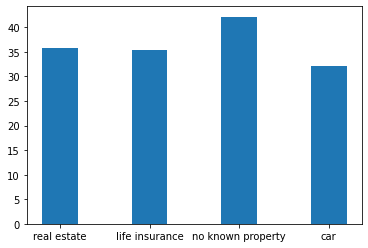

In [271]:
# only consider rows with credit_amount > 4000
# property_magnitude should be in the x-axis
# customer age will be the y-axis (in this case the average customer age for each property_magnitude)
# number of bars in chart: the number of property_magnitude values

property_magnitude_dict = dict() # mapping property magnitudes to list of ages
for index, row in germancredit_df.iterrows():
    if row["credit_amount"] > 4000:
        if row["property_magnitude"] not in property_magnitude_dict:
            property_magnitude_dict[row["property_magnitude"]] = [] # initialize list of customer ages for property magnitudes
        
        property_magnitude_dict[row["property_magnitude"]].append(row["age"])
        
property_magnitude_avg_dict = dict() # mapping property magnitudes to average ages
for property_magnitude in property_magnitude_dict:
    ages = property_magnitude_dict[property_magnitude]
    avg = sum(ages) / len(ages)
    
    property_magnitude_avg_dict[property_magnitude] = avg # update property_magnitude_dict[property_magnitude] to store average of ages instead of list of all ages
    
# print(property_magnitude_avg_dict)
# print(list(property_magnitude_avg_dict.keys()))
# print(list(property_magnitude_avg_dict.values()))
plt.bar(list(property_magnitude_avg_dict.keys()), list(property_magnitude_avg_dict.values()), width=0.4)
plt.show

3. For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:

a. Personal status

b. Credit history

c. Job

In [272]:
germancredit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


{'personal_status': {'male single': 24, 'male div/sep': 2, 'female div/dep/mar': 7, 'male mar/wid': 2}, 'credit_history': {'existing paid': 15, 'all paid': 2, 'critical/other existing credit': 14, 'delayed previously': 4}, 'job': {'skilled': 22, 'unskilled resident': 10, 'high qualif/self emp/mgmt': 2, 'unemp/unskilled non res': 1}}


Text(0.5, 1.0, 'Job')

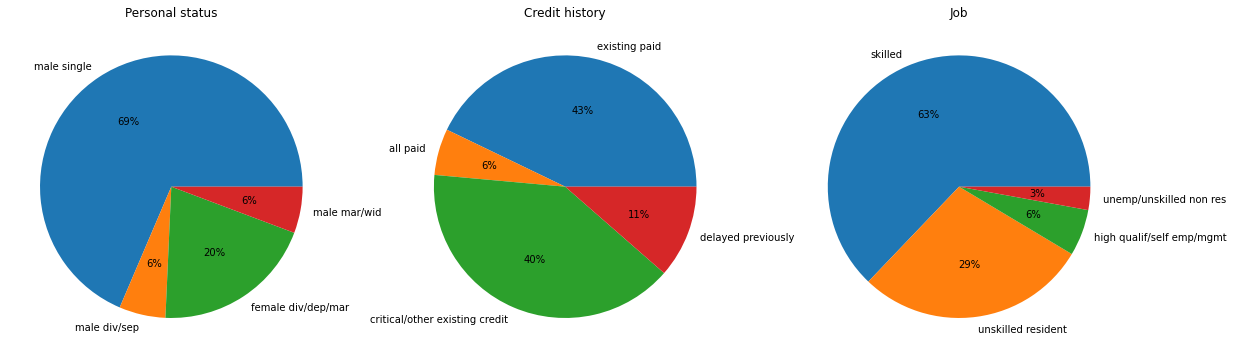

In [290]:
# have three pie charts in the subplot
# only look at rows in the df with "High" savings_status and age above 40
# have a dict mapping personal status, credit history, and job to each of their own lists, adding the values for each
# create another dict mapping the percentage of those values for each of the these three categories and put in a pie chart

categories_dict = dict()
categories_dict["personal_status"] = []
categories_dict["credit_history"] = []
categories_dict["job"] = []

for index, row in germancredit_df.iterrows():
    if row["savings_status"] == "High" and row["age"] > 40:
        personal_status_val = row["personal_status"]
        credit_history_val = row["credit_history"]
        job_val = row["job"]
        
        categories_dict["personal_status"].append(personal_status_val)
        categories_dict["credit_history"].append(credit_history_val)
        categories_dict["job"].append(job_val)
        
value_count_dict = dict()
value_count_dict["personal_status"] = dict()
value_count_dict["credit_history"] = dict()
value_count_dict["job"] = dict()

for category in categories_dict:
    for value in categories_dict[category]:
        if value not in value_count_dict[category]:
            value_count_dict[category][value] = 0
        
        value_count_dict[category][value] += 1
        
# print(value_count_dict)

# initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(20,12))

# Personal status
axes[0].pie(value_count_dict["personal_status"].values(), labels = list(value_count_dict["personal_status"].keys()), autopct='%.0f%%')
axes[0].set_title("Personal status")

# Credit history
axes[1].pie(value_count_dict["credit_history"].values(), labels = list(value_count_dict["credit_history"].keys()), autopct='%.0f%%')
axes[1].set_title("Credit history")

# Job
axes[2].pie(value_count_dict["job"].values(), labels = list(value_count_dict["job"].keys()), autopct='%.0f%%')
axes[2].set_title("Job")

# print(categories_dict)
# plt.pie(categories_dict["personal_status"])